In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Social_Network_Ads_KNN.csv')
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
k=11
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
def predict_output():
  age=int(input("enter age"))
  salary=int(input("enter salary"))

  X_new=np.array([age,salary]).reshape(1,-1)
  X_new=scaler.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "will not purchase"
  else:
    return "purchase"

In [ ]:
#meshgrid

x=[1,2,3,4,5]
y=[10,11,12]
XX,YY=np.meshgrid(x,y)
print(XX,YY)

[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]] [[10 10 10 10 10]
 [11 11 11 11 11]
 [12 12 12 12 12]]


In [ ]:
x=np.linspace(-40,40,100)
y=np.linspace(-50,50,90)

XX,YY=np.meshgrid(x,y)

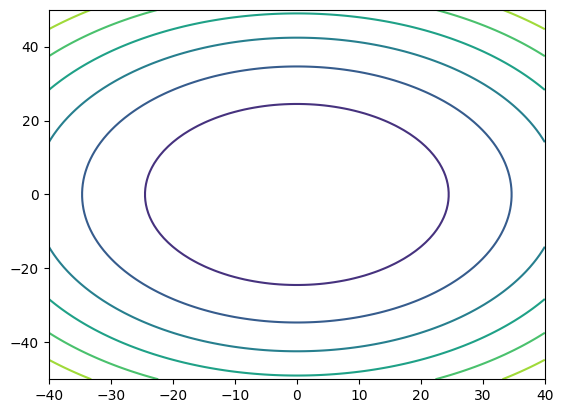

In [ ]:
#now we can plot any function with this like elipse example
Z=(XX**2)+(YY**2)

plt.contour(XX,YY,Z)


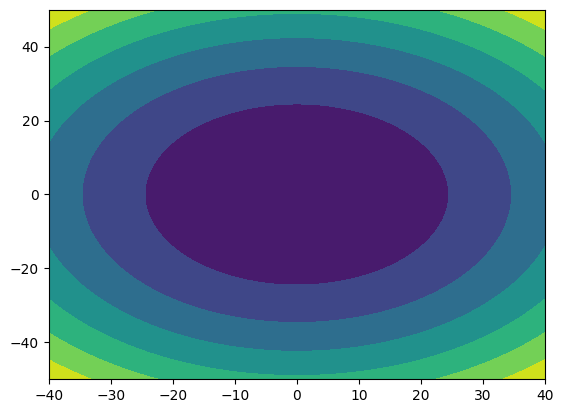

In [ ]:
plt.contourf(XX,YY,Z)

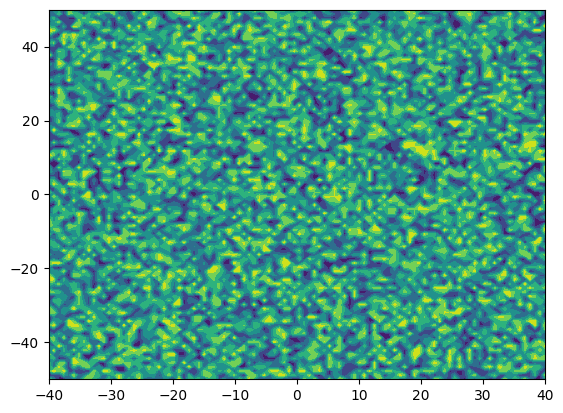

In [ ]:
Z=np.random.random((90,100))

plt.contourf(XX,YY,Z)

In [ ]:
#creating a meshgrid

#on x axis we need age and on y axis salary from X_train
#we need points in increasing order to create meshgrid not in chaotic way
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1, step=0.01)

XX,YY=np.meshgrid(a,b)

print(XX.shape,YY.shape)

(597, 600) (597, 600)


In [ ]:
#classify every point on meshgrid

#we have 597*600 customer

print('age of first customer',XX[0][0])
print('salary of first customer',YY[0][0])

knn.predict(np.array([XX[0][0],YY[0][0]]).reshape(1,-1))

age of first customer -2.8888493111921774
salary of first customer -2.6391080642414666


array([0])

In [ ]:
np.array([[1,2,3],[1,2,3],[8,9,0]]).ravel() #it transorm higher dimension to 1d array

array([1, 2, 3, 1, 2, 3, 8, 9, 0])

In [ ]:
np.array([XX.ravel(),YY.ravel()]).shape # but we need [[age,sal]] type so tranform it

(2, 358200)

In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

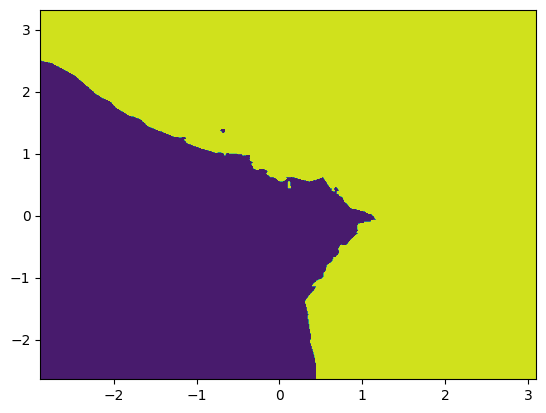

In [ ]:
#ploting the array as an image

plt.contourf(XX,YY,labels.reshape(XX.shape))  #we need lables same shape as that of XX and YY

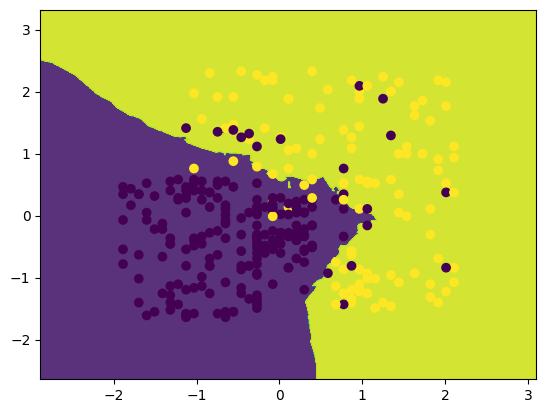

In [ ]:
#ploting all the training data on the plot
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.9)   #can use alpha for tranparency level
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)   #for color sequence we use c param